In [3]:
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
#import simplejson    #getting JSON in simplified format
import urllib        #for url stuff
#import gmaps       #for using google maps to visulalize places on maps
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands
from scipy.misc import imread, imresize, imsave  # for plots 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io
import base64
output_notebook()
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook
%matplotlib inline

Loading BokehJS ...

In [4]:
gotham_cabs_train = pd.read_csv('Train.csv')

In [5]:
gotham_cabs_train.head()

pickup_datetime  duration    pickup_x    pickup_y   dropoff_x  \
0  2034-06-14 11:44:16       244  144.390658  316.034801  141.088755   
1  2034-02-19 19:42:51       445  174.104736  383.734540  170.363867   
2  2034-05-30 13:58:49       306  151.585381  311.466854  152.488230   
3  2034-04-28 15:44:44       761  147.627782  303.740199  149.894498   
4  2034-06-03 17:40:42       272  145.751330  352.841919  142.927683   

    dropoff_y  
0  310.312918  
1  363.865249  
2  300.313651  
3  327.333384  
4  358.662367

In [6]:
gotham_cabs_train['id'] = pd.Series(range(0, gotham_cabs_train.shape[0]))

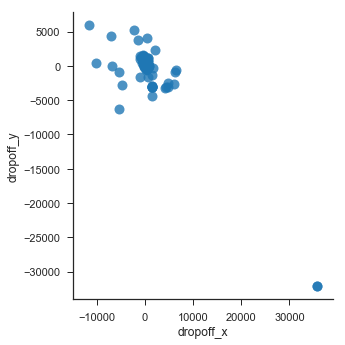

In [7]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('dropoff_x', # Horizontal axis
           'dropoff_y', # Vertical axis
           data=gotham_cabs_train, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue="z", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

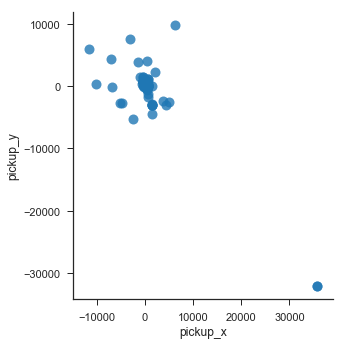

In [8]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('pickup_x', # Horizontal axis
           'pickup_y', # Vertical axis
           data=gotham_cabs_train, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue="z", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

Time taken by above cell is 1.4256901741027832.


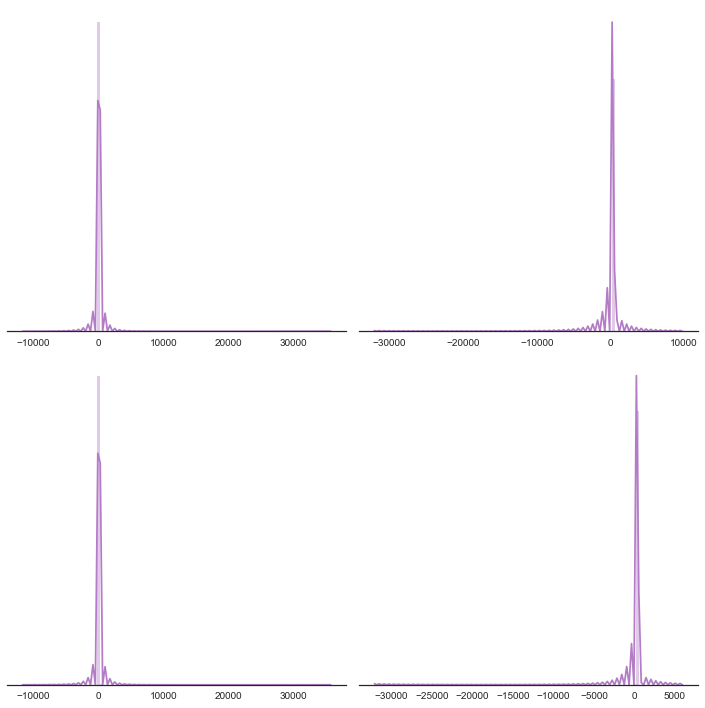

In [9]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(gotham_cabs_train['pickup_x'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(gotham_cabs_train['pickup_y'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(gotham_cabs_train['dropoff_x'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(gotham_cabs_train['dropoff_y'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

In [10]:
train_data_new = gotham_cabs_train.copy()
train_data_new = train_data_new.loc[(train_data_new.pickup_x > 83.936425) & (train_data_new.pickup_x < 172.092496)]
train_data_new = train_data_new.loc[(train_data_new.pickup_y > 294.136100) & (train_data_new.pickup_y < 387.073991)]
train_data_new = train_data_new.loc[(train_data_new.dropoff_x > 91.124687) & (train_data_new.dropoff_x < 172.325441)]
train_data_new = train_data_new.loc[(train_data_new.dropoff_y > 287.035072) & (train_data_new.dropoff_y < 398.384175)]


In [41]:
def plot_lat_long(df, quantile):
    quantiles = df.quantile([quantile, 1-quantile])
    train_data_new = df.copy()
    train_data_new = train_data_new.loc[(df.pickup_x > quantiles.loc[quantile].pickup_x) & (df.pickup_x < quantiles.loc[1-quantile].pickup_x)]
    train_data_new = train_data_new.loc[(df.pickup_y > quantiles.loc[quantile].pickup_y) & (df.pickup_y < quantiles.loc[1-quantile].pickup_y)]
    train_data_new = train_data_new.loc[(df.dropoff_x > quantiles.loc[quantile].dropoff_x) & (df.dropoff_x < quantiles.loc[1-quantile].dropoff_x)]
    train_data_new = train_data_new.loc[(df.dropoff_y > quantiles.loc[quantile].dropoff_y) & (df.dropoff_y < quantiles.loc[1-quantile].dropoff_y)]
    start = time.time()
    #sns.set(style="white", palette="muted", color_codes=True)
    #f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharex=False, sharey = False)
    ax1.scatter('pickup_x', 'pickup_y', data=train_data_new, s=2)
    ax2.scatter('dropoff_x', 'dropoff_y', data=train_data_new, s=2)
#     sns.despine(left=True)
#     sns.lmplot('pickup_x', 'pickup_y', data=train_data_new, fit_reg=False, scatter_kws={"marker": "D","s": 2})
#     sns.lmplot('dropoff_x', 'dropoff_y', data=train_data_new, fit_reg=False, scatter_kws={"marker": "D","s": 2})
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.show()
    

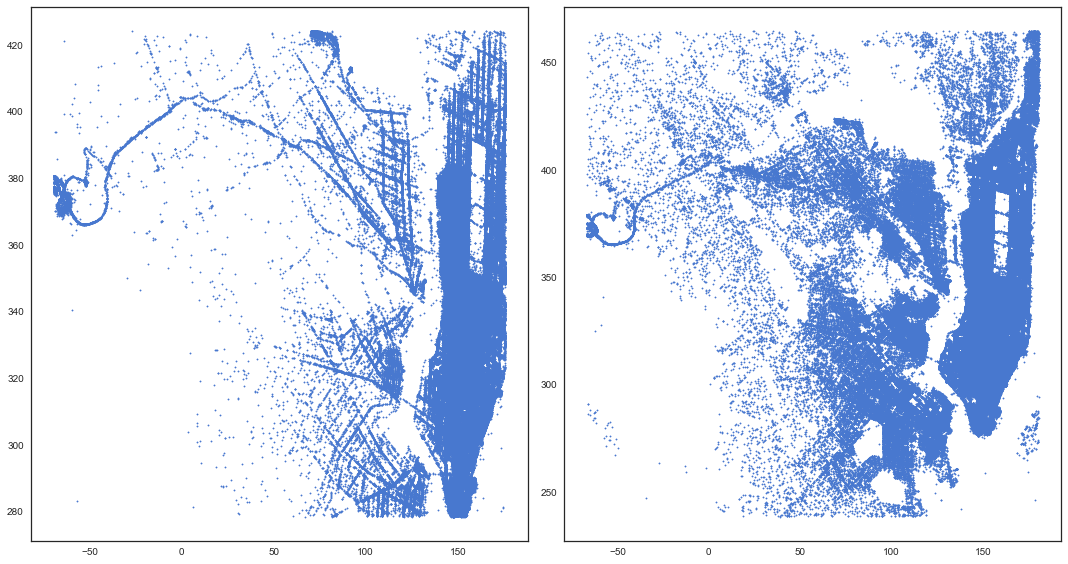

In [42]:
plot_lat_long(gotham_cabs_train, 0.005)

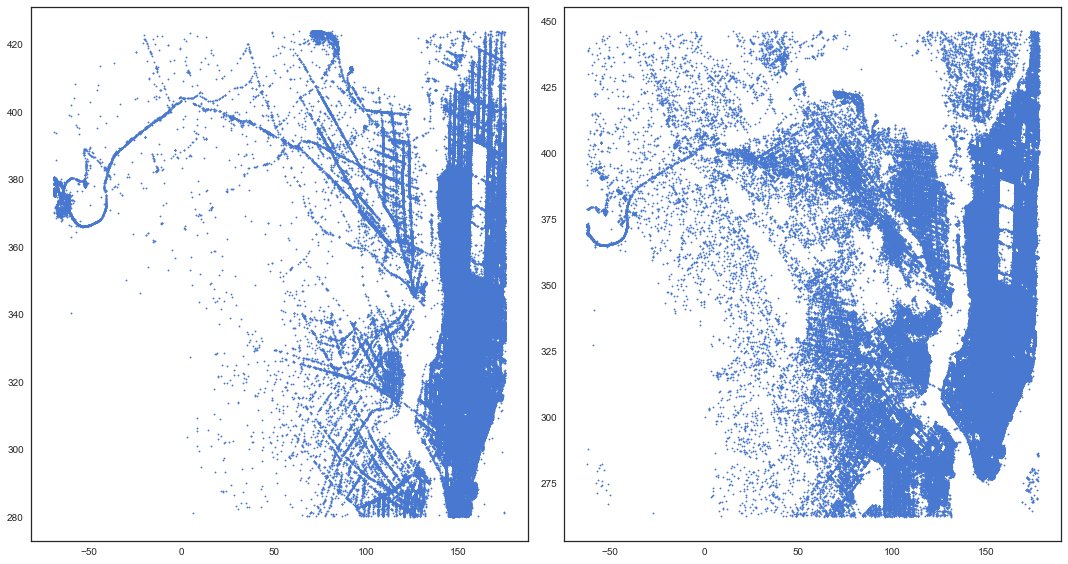

In [45]:
plot_lat_long(gotham_cabs_train, 0.008)

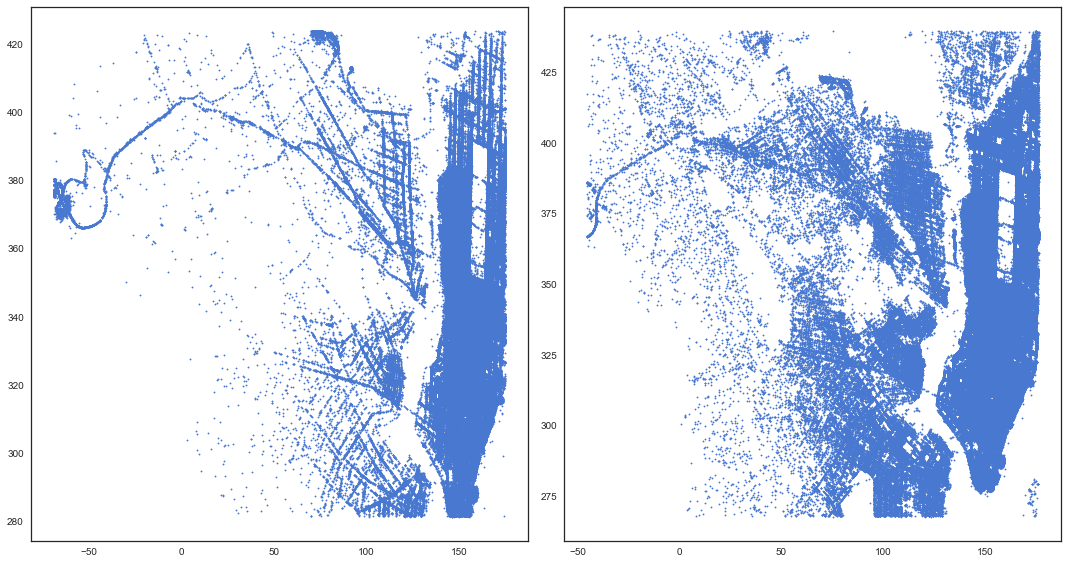

In [43]:
plot_lat_long(gotham_cabs_train, 0.01)

In [13]:
train_data_new.quantile([.05, .95]).loc[0.05]

duration       142.000000
pickup_x       140.476592
pickup_y       305.413616
dropoff_x      135.106504
dropoff_y      301.958947
id           65133.750000
Name: 0.05, dtype: float64

In [46]:
gotham_cabs_train.quantile([0.008, 1-0.008])

duration    pickup_x    pickup_y   dropoff_x   dropoff_y           id
0.008      63.0  -69.074012  280.094962  -62.085059  262.488686    10399.992
0.992    3043.0  175.174763  423.927400  177.601808  446.378837  1289599.008

In [51]:
quantile = 0.008
quantiles = gotham_cabs_train.quantile([quantile, 1-quantile])
gotham_cabs_train_fil = gotham_cabs_train.copy()
gotham_cabs_train_fil = gotham_cabs_train_fil.loc[(gotham_cabs_train.pickup_x > quantiles.loc[quantile].pickup_x) & (gotham_cabs_train.pickup_x < quantiles.loc[1-quantile].pickup_x)]
gotham_cabs_train_fil = gotham_cabs_train_fil.loc[(gotham_cabs_train.pickup_y > quantiles.loc[quantile].pickup_y) & (gotham_cabs_train.pickup_y < quantiles.loc[1-quantile].pickup_y)]
gotham_cabs_train_fil = gotham_cabs_train_fil.loc[(gotham_cabs_train.dropoff_x > quantiles.loc[quantile].dropoff_x) & (gotham_cabs_train.dropoff_x < quantiles.loc[1-quantile].dropoff_x)]
gotham_cabs_train_fil = gotham_cabs_train_fil.loc[(gotham_cabs_train.dropoff_y > quantiles.loc[quantile].dropoff_y) & (gotham_cabs_train.dropoff_y < quantiles.loc[1-quantile].dropoff_y)]

Time taken by above cell is 1.07794189453125.


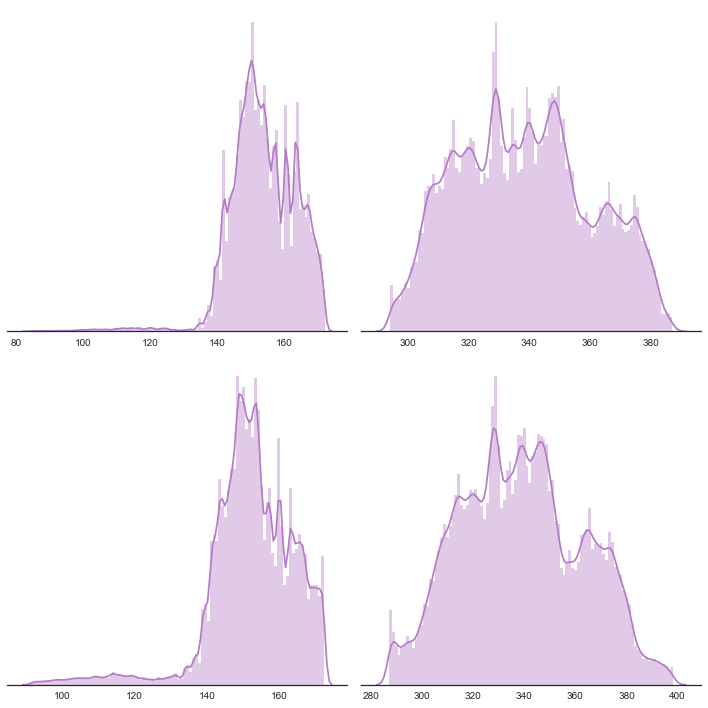

In [15]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(train_data_new['pickup_x'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_y'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_x'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_y'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

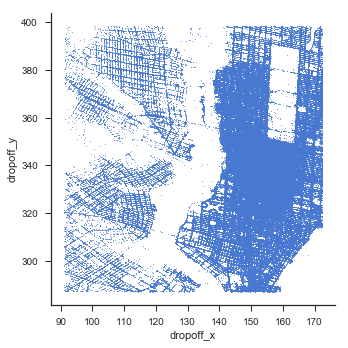

In [16]:
sns.set_context("notebook", font_scale=1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('dropoff_x', 'dropoff_y', data=train_data_new, fit_reg=False, scatter_kws={"marker": "D","s": 1})